In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

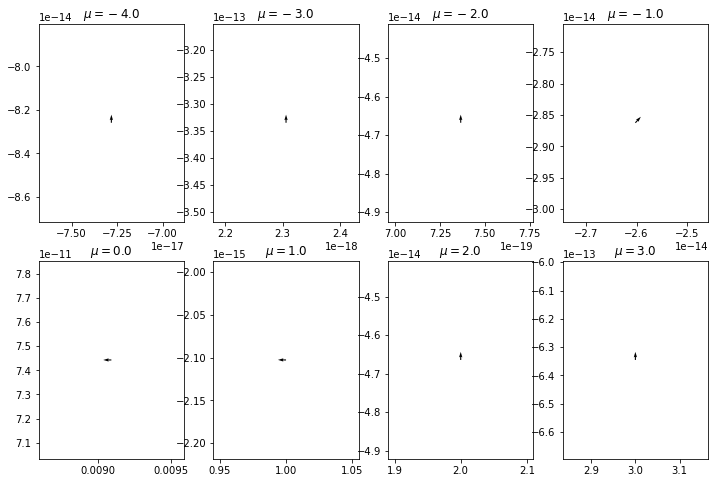

In [38]:
# 8.1.1
# 画出 \dot x = \mu x - x^2, \dot y = -y 随\mu变化的相图
def func_a(z, t, mu):
    x, y = z
    return mu * x - x**2, -y

def func_b(z, t, mu):
    x, y = z
    return mu * x + x**3, -y

def bifurcation_diagram(func, x0, y0, mu, t):
   
    x = np.zeros(len(mu))
    y = np.zeros(len(mu))
    for i in range(len(mu)):
        x[i], y[i] = odeint(func, [x0, y0], t, args=(mu[i],))[-1]        
    plt.figure(figsize=(12, 8))
    for i in range(len(mu)):  
        X = x[i]
        Y = y[i]     
        U = mu[i] * X - X**2
        V = -Y
        plt.subplot(2, len(mu)//2, i+1)
        plt.quiver(X, Y, U, V)
        plt.title(r'$\mu = {}$'.format(mu[i]))
    plt.show()
mu = np.round(np.linspace(-4, 3, 8),1)
bifurcation_diagram(func_a, 0.1, 0.1, mu, np.linspace(0, 100, 1000))
# # 8.1.1
# # 画出 \dot x = \mu x - x^2, \dot y = -y 随\mu变化的分岔图
# def func_a(z, t, mu):
#     x, y = z
#     return mu * x - x**2, -y

# def func_b(z, t, mu):
#     x, y = z
#     return mu * x + x**3, -y

# def bifurcation_diagram(func, x0, y0, mu, t, n):
#     mu = np.linspace(-4, 0, 1000)
#     x = np.zeros(1000)
#     y = np.zeros(1000)
#     for i in range(1000):
#         x[i], y[i] = odeint(func, [x0, y0], t, args=(mu[i],))[n]        
#     plt.plot(mu, x, 'k-')
#     plt.plot(mu, y, 'k-')
#     plt.xlabel(r'$\mu$')
#     plt.ylabel(r'$x$')
#     plt.show()

# bi = bifurcation_diagram(func_a, 0.1, 0.1, 0, np.linspace(0, 100, 1000), -1)
# bi2 = bifurcation_diagram(func_b, 0.1, 0.1, 1, np.linspace(0, 100, 1000), -1)

(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)
(200,)


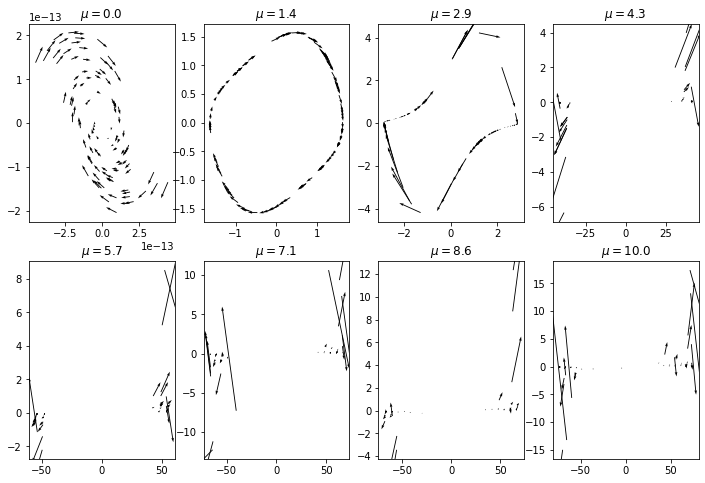

In [56]:
# 8.4.4
#探究 \ddot \theta + (1 - \mu \cos\theta) \dot \theta + \sin\theta = 0 的相图
%timeit
def func(z, t,n, mu):
    theta = z[0:n]
    omega = z[n:2*n]
    return np.concatenate((omega, -(1 - mu * np.cos(theta)) * omega - np.sin(theta)))

def phase_diagram(func, theta0, omega0, mu, n, t):
    theta = np.zeros((len(mu),n))
    omega = np.zeros((len(mu),n))
    for i in range(len(mu)):
        res = odeint(func, np.array((theta0, omega0)).flatten(), t, args=(n,mu[i],))[-1] 
        print(res.shape)
        theta[i] = res[0:n]
        omega[i] = res[n:2*n]
    plt.figure(figsize=(12, 8))
    for i in range(len(mu)):  
        X = theta[i]
        Y = omega[i]     
        U = omega[i]
        V = -(1 - mu[i] * np.cos(theta[i])) * omega[i] - np.sin(theta[i])
        plt.subplot(2, len(mu)//2, i+1)
        plt.quiver(X, Y, U, V)
        plt.title(r'$\mu = {}$'.format(mu[i]))
    plt.show()
mu = np.round(np.linspace(0, 10, 8),1)
n = 100
x0 = np.random.uniform(-1,1,n)
y0 = np.random.uniform(-1,1,n)
phase_diagram(func, x0, y0, mu,n, np.linspace(0, 100, 1000))



(200,)
(200,)
(200,)
(200,)
(200,)
(200,)


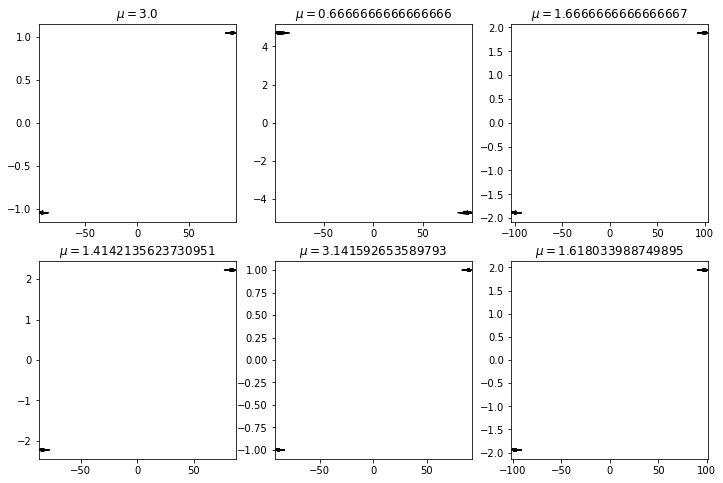

In [70]:
#8.6.5 画出李萨如图形 x(t) = \sin t, y(t) = \sin (\omega t)

%timeit
def func(z, t,n, mu):
    theta = z[0:n]
    omega = z[n:2*n]
    return np.concatenate((np.sin(omega), np.sin(mu * omega)))

def phase_diagram(func, theta0, omega0, mu, n, t):
    theta = np.zeros((len(mu),n))
    omega = np.zeros((len(mu),n))
    for i in range(len(mu)):
        res = odeint(func, np.array((theta0, omega0)).flatten(), t, args=(n,mu[i],))[-1]
        print(res.shape)
        theta[i] = res[0:n]
        omega[i] = res[n:2*n]
    plt.figure(figsize=(12, 8))
    for i in range(len(mu)):  
        X = theta[i]
        Y = omega[i]     
        U = np.sin(omega[i])
        V = np.sin(mu[i] * omega[i])
        plt.subplot(2, len(mu)//2, i+1)
        plt.quiver(X, Y, U, V)
        plt.title(r'$\mu = {}$'.format(mu[i]))
    plt.show()
#mu = np.round(np.linspace(0, 10, 8),1)
mu = np.array([3,2/3,5/3,np.sqrt(2),np.pi,1/2*(1+np.sqrt(5))])
n = 100
x0 = np.random.uniform(-0.1,0.1,n)
y0 = np.random.uniform(-0.1,0.1,n)
phase_diagram(func, x0, y0, mu,n, np.linspace(0, 100, 1000))

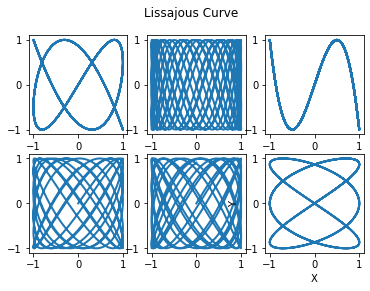

In [84]:
# 8.6.5 莉萨如图形
import numpy as np
import matplotlib.pyplot as plt


mu = np.array([3,2/3,5/3,np.sqrt(2),np.pi,1/2*(1+np.sqrt(5))])
fig,ax = plt.subplots(2, len(mu)//2)
# 设置参数
A = 1  # 振幅
a = 1  # x轴方向的频率
b = mu  # y轴方向的频率
delta = 0  # 相位差

for index,b in enumerate(mu):
    i = index
    # 生成参数范围
    t = np.linspace(0, 20 * np.pi, 1000)

    # 计算x和y坐标
    x = A * np.sin(a * t + delta)
    y = A * np.sin(b * t)

    # 绘制莉萨如图形
    ax[i%2][i//2-1].plot(x, y, linewidth=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    fig.suptitle('Lissajous Curve')


    # 显示图形
plt.show()

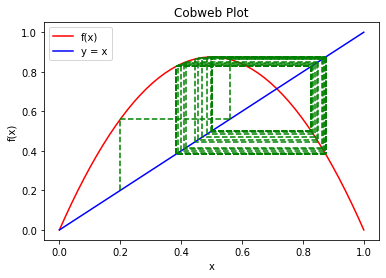

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# 定义动力系统的演化函数
def system(x, r):
    return r * x * (1 - x)

# 定义蛛网图函数
def cobweb_plot(func, r, x0, n):
    x = np.linspace(0, 1, n)
    y = func(x, r)
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'r', label='f(x)')
    ax.plot(x, x, 'b', label='y = x')
    
    # 绘制蛛网图
    x_val = x0
    for _ in range(n):
        y_val = func(x_val, r)
        ax.plot([x_val, x_val], [x_val, y_val], 'g--')
        ax.plot([x_val, y_val], [y_val, y_val], 'g--')
        x_val = y_val
    
    ax.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Cobweb Plot')

    plt.show()

# 设置参数
r = 3.5  # 控制参数
x0 = 0.2  # 初始条件
n = 50  # 迭代次数

# 绘制蛛网图
cobweb_plot(system, r, x0, n)

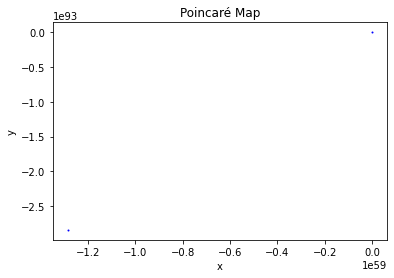

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 定义动力系统的演化函数
def system(x, y, z, a, b, c):
    dxdt = a * (y - x)
    dydt = x * (c - z) - y
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

# 定义庞加莱映射函数
def poincare_map(system, x0, y0, z0, n, a, b, c, plane):
    x_vals = [x0]
    y_vals = [y0]
    z_vals = [z0]

    for _ in range(n):
        dxdt, dydt, dzdt = system(x_vals[-1], y_vals[-1], z_vals[-1], a, b, c)
        x_vals.append(x_vals[-1] + dxdt)
        y_vals.append(y_vals[-1] + dydt)
        z_vals.append(z_vals[-1] + dzdt)

    # 庞加莱映射，选择平面上的一点
    poincare_x = []
    poincare_y = []
    for i in range(len(x_vals)):
        if i % plane == 0:
            poincare_x.append(x_vals[i])
            poincare_y.append(y_vals[i])

    return poincare_x, poincare_y

# 设置参数
a = 10.0
b = 28.0
c = 8.0 / 3.0
x0, y0, z0 = (0.1, 0.1, 0.1)  # 初始条件
n = 10000  # 迭代次数
plane = 10  # 庞加莱截面选择的平面

# 计算庞加莱映射
poincare_x, poincare_y = poincare_map(system, x0, y0, z0, n, a, b, c, plane)

# 绘制庞加莱映射结果
plt.scatter(poincare_x, poincare_y, s=1, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poincaré Map')
plt.show()

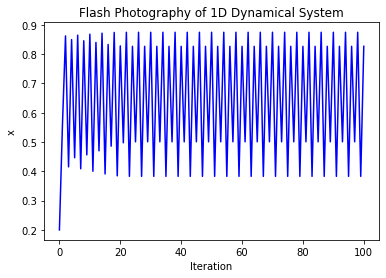

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一维动力系统的演化函数
def system(x, r):
    return r * x * (1 - x)

# 定义闪光拍照函数
def flash_photography(system, x0, r, n):
    x_vals = [x0]

    for _ in range(n):
        x_vals.append(system(x_vals[-1], r))

    return x_vals

# 设置参数
r = 3.5  # 控制参数
x0 = 0.2  # 初始条件
n = 100  # 迭代次数

# 进行闪光拍照
x_vals = flash_photography(system, x0, r, n)

# 绘制结果
plt.plot(range(n+1), x_vals, 'b')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Flash Photography of 1D Dynamical System')
plt.show()

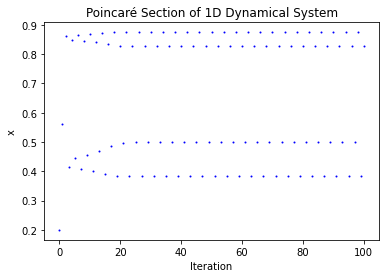

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一维动力系统的演化函数
def system(x, r):
    return r * x * (1 - x)

# 定义庞加莱截面函数
def poincare_section(system, x0, r, n, section_interval):
    x_vals = [x0]

    for _ in range(n):
        x = system(x_vals[-1], r)
        if _ % section_interval == 0:
            x_vals.append(x)

    return x_vals

# 设置参数
r = 3.5  # 控制参数
x0 = 0.2  # 初始条件
n = 1000  # 迭代次数
section_interval = 10  # 庞加莱截面选择的间隔

# 进行庞加莱截面观察
x_vals = poincare_section(system, x0, r, n, section_interval)

# 绘制庞加莱截面结果
plt.scatter(range(len(x_vals)), x_vals, s=1, c='b')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Poincaré Section of 1D Dynamical System')
plt.show()

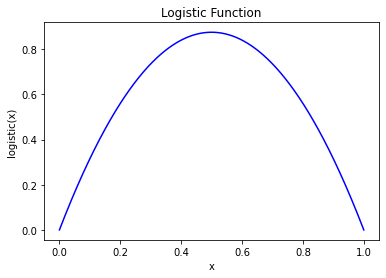

In [91]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, r):
    return r * x * (1 - x)

# 设置参数
r = 3.5  # 控制参数
x = np.linspace(0, 1, 1000)  # 在0到1之间生成1000个均匀分布的点

# 计算logistic函数的值
y = logistic(x, r)

# 绘制logistic函数曲线
plt.plot(x, y, 'b')
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.title('Logistic Function')
plt.show()

$$\dot{\symbf{x}}_i = \symbf{v}_i + \frac{ 1}{N}\sum_{j\ne i}^N [ I_{att}(\symbf{x}_j-\symbf{x}_i)F(\theta_j - \theta_i) - I_{rep}(\symbf{x}_j-\symbf{x}_i)] $$
$$\dot{\theta}_i = \omega_i + \frac{K }{N} \sum_{j=1}^N {H_{att}(\theta_j - \theta_i)}G(\symbf{x}_j-\symbf{x}_i)$$

$e=mc^2$

\usepackage{amsmath,bm,amsfonts,amssymb,enumerate,epsfig,bbm,calc,color,ifthen,capt-of,multimedia,hyperref}

$$\dot{\symbf{x}}_i = \symbf{v}_i + \frac{ 1}{N}\sum_{j\ne i}^N [ I_{att}(\symbf{x}_j-\symbf{x}_i)F(\theta_j - \theta_i) - I_{rep}(\symbf{x}_j-\symbf{x}_i)] $$
$$\dot{\theta}_i = \omega_i + \frac{K }{N} \sum_{j=1}^N {H_{att}(\theta_j - \theta_i)}G(\symbf{x}_j-\symbf{x}_i)$$